In [13]:
#install dependencies
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.stats as st
import numpy as np

In [14]:
#import data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

In [15]:
#read data files 
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [16]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
 # Checking the number of mice.
mouse_count = len(combined_data["Mouse ID"].value_counts())
mouse_count

249

In [18]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_data.loc[combined_data.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_df = combined_data[combined_data['Mouse ID'].isin(dup_mice)==False]
study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice in the clean DataFrame.
study_mice = study_df["Mouse ID"].value_counts()
print(len(study_mice))

248


In [21]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
statistics_summary = pd.DataFrame(combined_data.groupby("Drug Regimen").count())

#calculate mean for drug regimen
statistics_summary["Mean"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())

#calculate median for drug regimen
statistics_summary["Median"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())

#calculate stan dev. for drug regimen
statistics_summary["Standard Deviation"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())

#calculate variance for drug regimen
statistics_summary["Variance"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())

#calculate SEM for drug regimen
statistics_summary["SEM"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())


statistics_summary.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,,,,,,,
Capomulin,230,230,230,230,230,230,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,178,178,178,178,178,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,178,178,178,178,178,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,188,188,188,188,188,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,186,186,186,186,186,186,54.331565,52.509285,8.134708,66.173479,0.596466


In [32]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
statistics_group = study_df.groupby('Drug Regimen')
statistics_summary = statistics_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
statistics_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


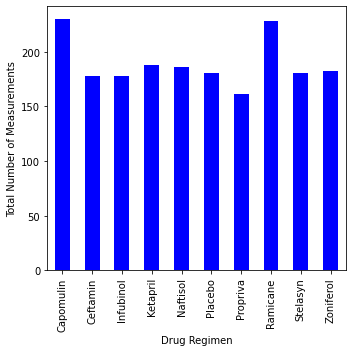

In [91]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

num_mice_per_treatment = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 


num_mice_per_treatment.plot.bar(figsize=(5,5), color='b',fontsize = 10)
num_mice_per_treatment
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Total Number of Measurements",fontsize = 10)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

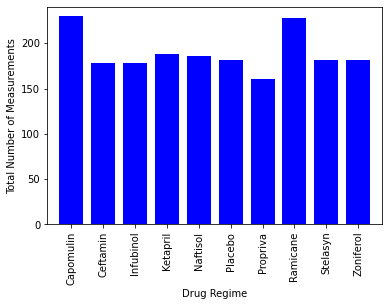

In [57]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
x_axis = np.arange(len(num_mice_per_treatment))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6,4))
plt.bar(x_axis, num_mice_per_treatment, color = "b", width = .75)
plt.xticks(tick_locations, num_mice_per_treatment.index.values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(num_mice_per_treatment)+10)

plt.xlabel("Drug Regime")
plt.ylabel("Total Number of Measurements")

plt.show

In [80]:
#  Group by gender and get the number to plot
groupby_gender = combined_data.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))


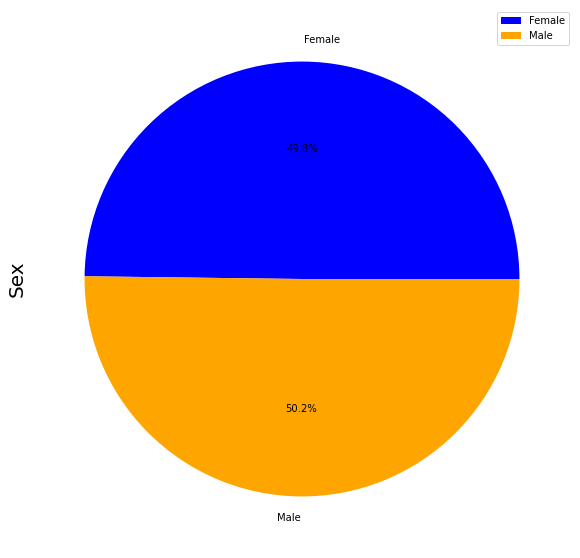

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ['blue', 'orange']
plot = mouse_gender.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=360, autopct="%1.1f%%")
plt.ylabel('Sex',fontsize = 20)
plt.show()

Text(0, 0.5, 'Sex')

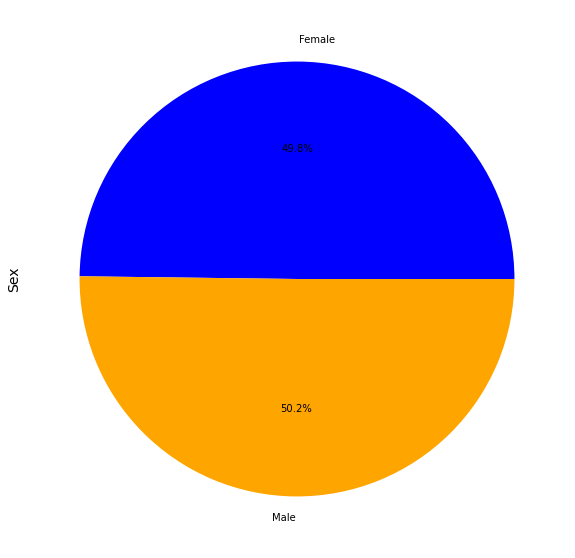

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.8,50.2]

#Set colors for each section of the pie
colors = ['blue', 'orange']

#Create the pie chart based upon the values 
plt.subplots(figsize=(15, 10))
plt.pie(sizes,labels=labels, colors=colors, autopct="%1.1f%%",startangle=360,)
plt.ylabel('Sex',fontsize = 14)


In [ ]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [ ]:
 # Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [ ]:
 # Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen